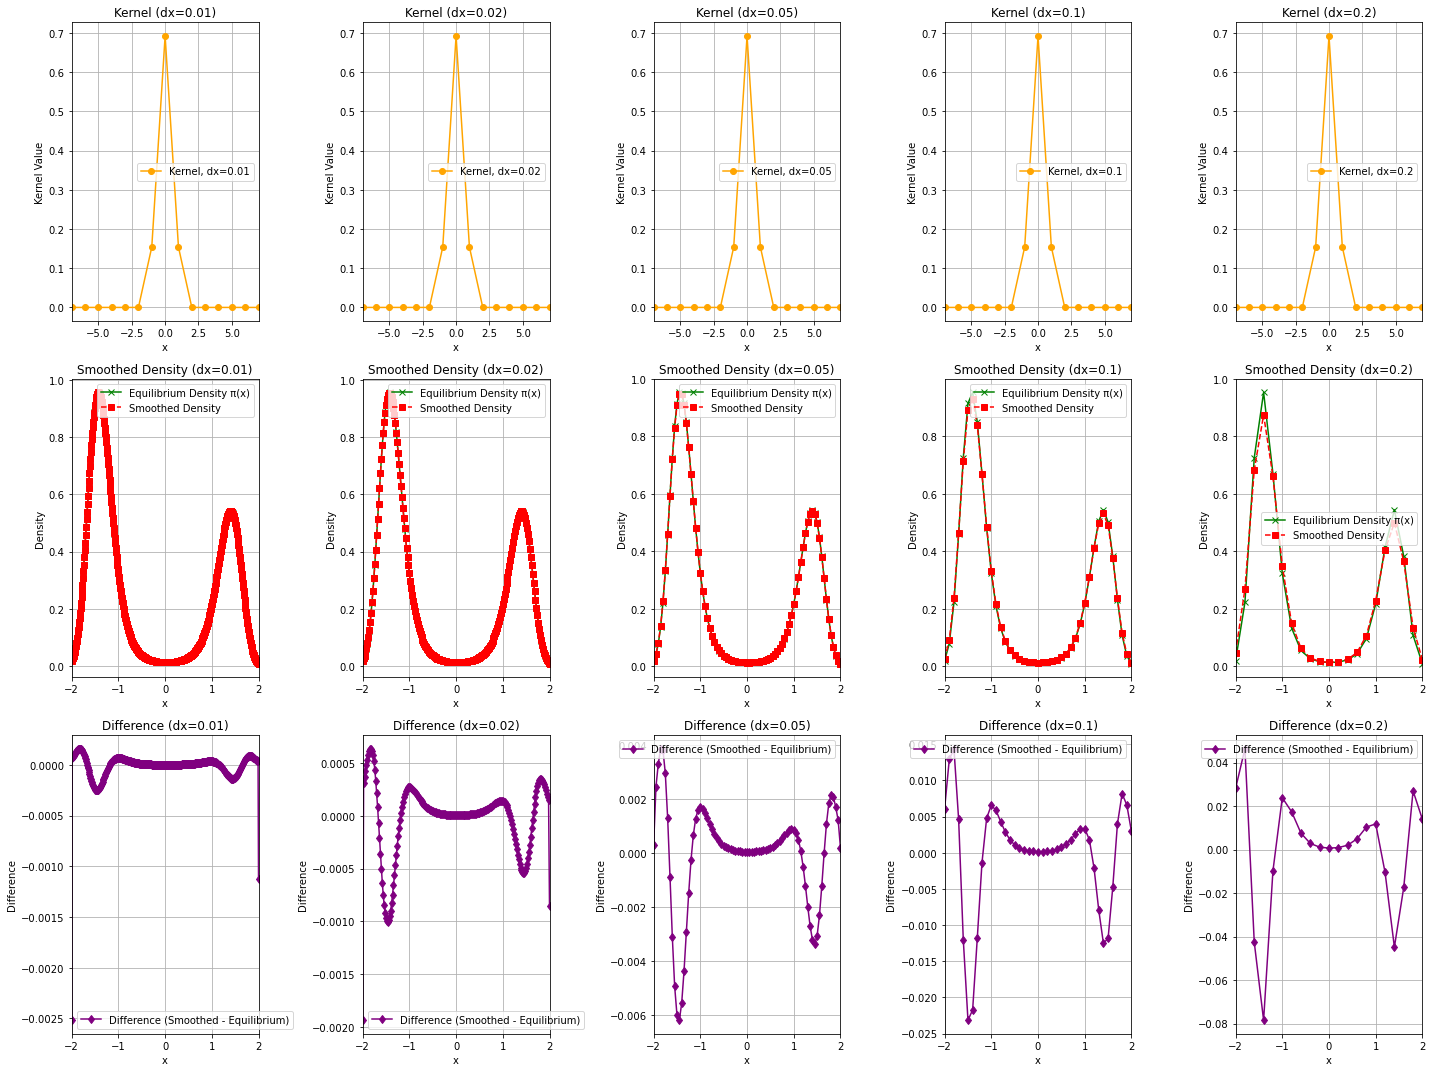

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve as scipy_convolve

# Custom convolve function
def convolve(g1, g2, mode="same", method="auto"):
    """Perform convolution between two grids via scipy.signal.convolve."""
    result = scipy_convolve(g1, g2, mode=mode, method=method)
    stepsizes_product = 1  # Modify if stepsizes are known and consistent
    result /= stepsizes_product
    return result

# Define the potential function V(x)
def potential(x):
    return x**4 - 4*x**2 + 0.2*x

# Calculate the equilibrium density π(x)
def equilibrium_density(x, beta=1.0):
    V_x = potential(x)
    Z = np.trapz(np.exp(-beta * V_x), x)  # Normalization constant
    return np.exp(-beta * V_x) / Z

# Create Piecewise Parabolic kernel for convolution
def piecewise_parabolic_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel_values = np.zeros_like(kernel)
    for i, x in enumerate(kernel):
        if -sigma <= x < -sigma / 2:
            kernel_values[i] = (2 / sigma) * (1 + x / sigma)**2
        elif -sigma / 2 <= x <= sigma / 2:
            kernel_values[i] = (1 / sigma) - (2 / sigma) * (x / sigma)**2
        elif sigma / 2 < x <= sigma:
            kernel_values[i] = (2 / sigma) * (1 - x / sigma)**2
    kernel_values /= np.sum(kernel_values)
    return kernel_values

# Parameters
beta = 1.0
sigma = 1.5  # Fixed bandwidth
lattice_spacings = [0.01, 0.02, 0.05, 0.1, 0.2]  # Varying lattice spacings
x_min, x_max = -2, 2

# Create subplots for kernels and densities
fig, axs = plt.subplots(3, len(lattice_spacings), figsize=(20, 15))

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Set the background color of all axes to white
for ax in axs.flat:
    ax.set_facecolor('white')

# Iterate over the different lattice spacings
for i, dx in enumerate(lattice_spacings):
    # Define the grid for x
    x = np.arange(x_min, x_max + dx, dx)
    
    # Calculate equilibrium density
    pi_x = equilibrium_density(x, beta)
    
    # Generate Piecewise Parabolic kernel
    kernel_size = int(5 * sigma)
    parabolic_kernel_array = piecewise_parabolic_kernel(kernel_size, sigma)
    
    # Perform convolution to smooth the density
    smoothed_pi_x = convolve(pi_x, parabolic_kernel_array, mode='same')
    
    # Plot Piecewise Parabolic kernel
    kernel_x = np.linspace(-kernel_size, kernel_size, len(parabolic_kernel_array))
    axs[0, i].plot(kernel_x, parabolic_kernel_array, label=f'Kernel, dx={dx}', color='orange', marker='o')
    axs[0, i].set_xlabel('x')
    axs[0, i].set_ylabel('Kernel Value')
    axs[0, i].set_title(f'Kernel (dx={dx})')
    axs[0, i].legend()
    axs[0, i].grid(True)
    axs[0, i].set_xlim(-kernel_size, kernel_size)
    
    # Plot equilibrium density and smoothed density
    axs[1, i].plot(x, pi_x, label='Equilibrium Density π(x)', color='green', marker='x')
    axs[1, i].plot(x, smoothed_pi_x, label='Smoothed Density', color='red', linestyle='--', marker='s')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('Density')
    axs[1, i].set_title(f'Smoothed Density (dx={dx})')
    axs[1, i].legend()
    axs[1, i].grid(True)
    axs[1, i].set_xlim(x_min, x_max)
    
    # Compute and plot the difference between densities
    density_difference = smoothed_pi_x - pi_x
    axs[2, i].plot(x, density_difference, label='Difference (Smoothed - Equilibrium)', color='purple', marker='d')
    axs[2, i].set_xlabel('x')
    axs[2, i].set_ylabel('Difference')
    axs[2, i].set_title(f'Difference (dx={dx})')
    axs[2, i].legend()
    axs[2, i].grid(True)
    axs[2, i].set_xlim(x_min, x_max)

# Adjust layout and save density comparison and difference plots
plt.tight_layout()
plt.savefig('PiecewiseParabolicDensity_varying_dx.png', dpi=300, bbox_inches='tight', facecolor='white')  # Ensure white background

# Display the figure with all plots
plt.show()


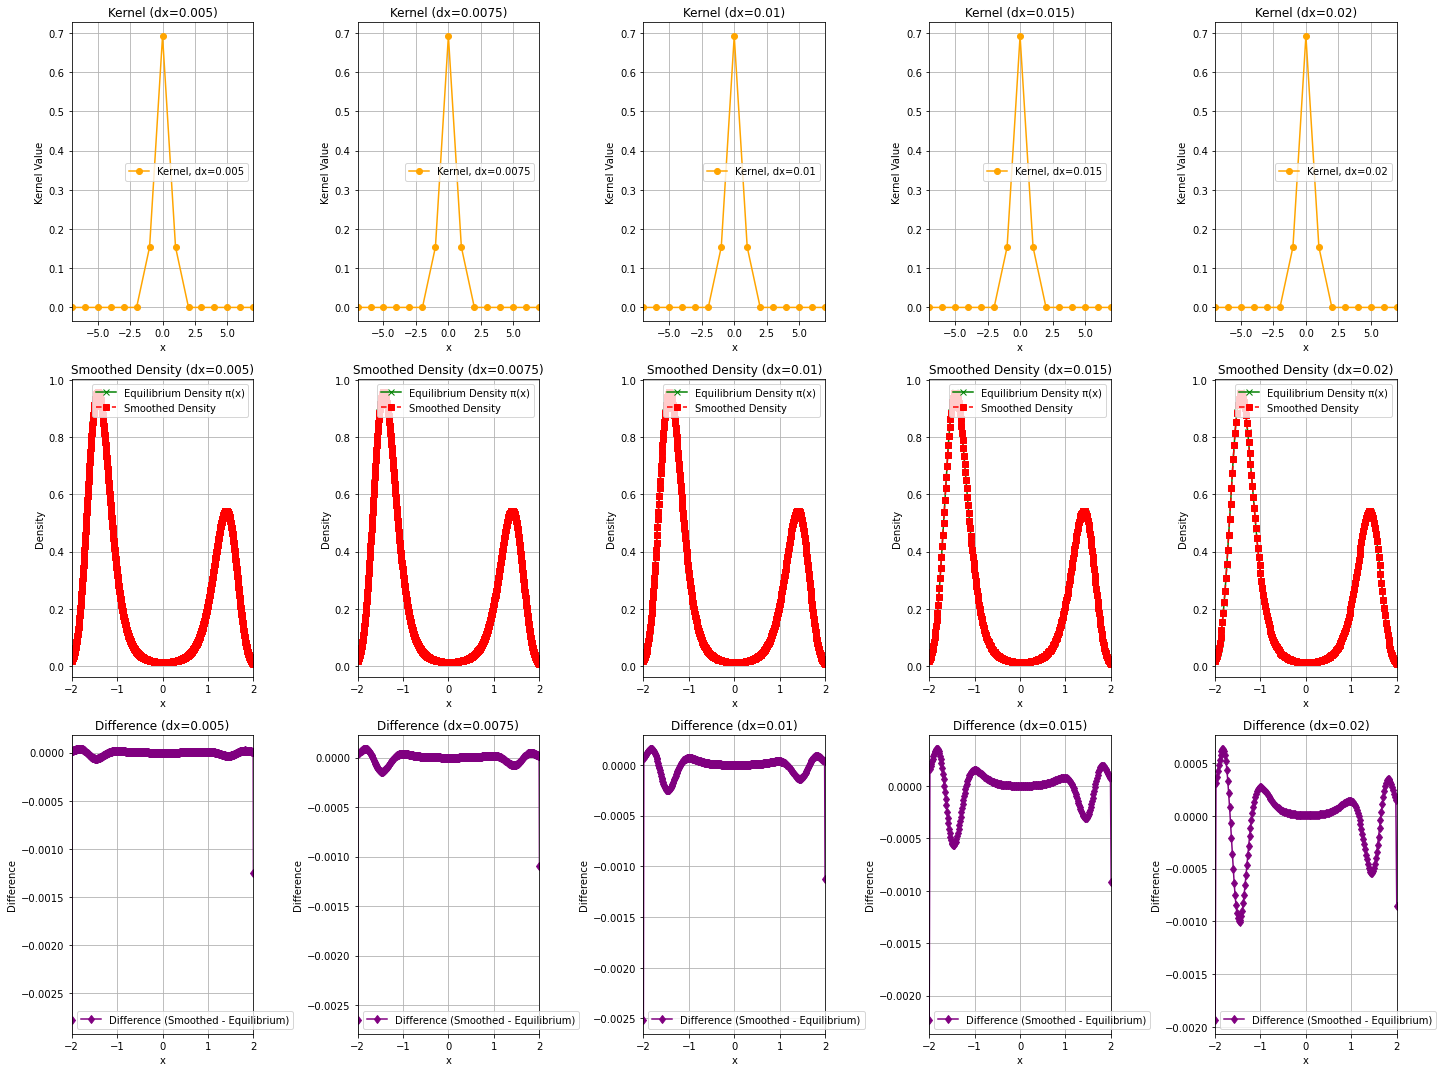

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve as scipy_convolve

# Custom convolve function
def convolve(g1, g2, mode="same", method="auto"):
    """Perform convolution between two grids via scipy.signal.convolve."""
    result = scipy_convolve(g1, g2, mode=mode, method=method)
    stepsizes_product = 1  # Modify if stepsizes are known and consistent
    result /= stepsizes_product
    return result

# Define the potential function V(x)
def potential(x):
    return x**4 - 4*x**2 + 0.2*x

# Calculate the equilibrium density π(x)
def equilibrium_density(x, beta=1.0):
    V_x = potential(x)
    Z = np.trapz(np.exp(-beta * V_x), x)  # Normalization constant
    return np.exp(-beta * V_x) / Z

# Create Piecewise Parabolic kernel for convolution
def piecewise_parabolic_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel_values = np.zeros_like(kernel)
    for i, x in enumerate(kernel):
        if -sigma <= x < -sigma / 2:
            kernel_values[i] = (2 / sigma) * (1 + x / sigma)**2
        elif -sigma / 2 <= x <= sigma / 2:
            kernel_values[i] = (1 / sigma) - (2 / sigma) * (x / sigma)**2
        elif sigma / 2 < x <= sigma:
            kernel_values[i] = (2 / sigma) * (1 - x / sigma)**2
    kernel_values /= np.sum(kernel_values)
    return kernel_values

# Parameters
beta = 1.0
sigma = 1.5  # Fixed bandwidth
finer_lattice_spacings = [0.005, 0.0075, 0.01, 0.015, 0.02]  # Finer lattice spacings
x_min, x_max = -2, 2

# Create subplots for kernels and densities
fig, axs = plt.subplots(3, len(finer_lattice_spacings), figsize=(20, 15))

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Set the background color of all axes to white
for ax in axs.flat:
    ax.set_facecolor('white')

# Iterate over the different lattice spacings
for i, dx in enumerate(finer_lattice_spacings):
    # Define the grid for x
    x = np.arange(x_min, x_max + dx, dx)
    
    # Calculate equilibrium density
    pi_x = equilibrium_density(x, beta)
    
    # Generate Piecewise Parabolic kernel
    kernel_size = int(5 * sigma)
    parabolic_kernel_array = piecewise_parabolic_kernel(kernel_size, sigma)
    
    # Perform convolution to smooth the density
    smoothed_pi_x = convolve(pi_x, parabolic_kernel_array, mode='same')
    
    # Plot Piecewise Parabolic kernel
    kernel_x = np.linspace(-kernel_size, kernel_size, len(parabolic_kernel_array))
    axs[0, i].plot(kernel_x, parabolic_kernel_array, label=f'Kernel, dx={dx}', color='orange', marker='o')
    axs[0, i].set_xlabel('x')
    axs[0, i].set_ylabel('Kernel Value')
    axs[0, i].set_title(f'Kernel (dx={dx})')
    axs[0, i].legend()
    axs[0, i].grid(True)
    axs[0, i].set_xlim(-kernel_size, kernel_size)
    
    # Plot equilibrium density and smoothed density
    axs[1, i].plot(x, pi_x, label='Equilibrium Density π(x)', color='green', marker='x')
    axs[1, i].plot(x, smoothed_pi_x, label='Smoothed Density', color='red', linestyle='--', marker='s')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('Density')
    axs[1, i].set_title(f'Smoothed Density (dx={dx})')
    axs[1, i].legend()
    axs[1, i].grid(True)
    axs[1, i].set_xlim(x_min, x_max)
    
    # Compute and plot the difference between densities
    density_difference = smoothed_pi_x - pi_x
    axs[2, i].plot(x, density_difference, label='Difference (Smoothed - Equilibrium)', color='purple', marker='d')
    axs[2, i].set_xlabel('x')
    axs[2, i].set_ylabel('Difference')
    axs[2, i].set_title(f'Difference (dx={dx})')
    axs[2, i].legend()
    axs[2, i].grid(True)
    axs[2, i].set_xlim(x_min, x_max)

# Adjust layout and save density comparison and difference plots
plt.tight_layout()
plt.savefig('PiecewiseParabolicDensity_finer_dx.png', dpi=300, bbox_inches='tight', facecolor='white')  # Ensure white background

# Display the figure with all plots
plt.show()


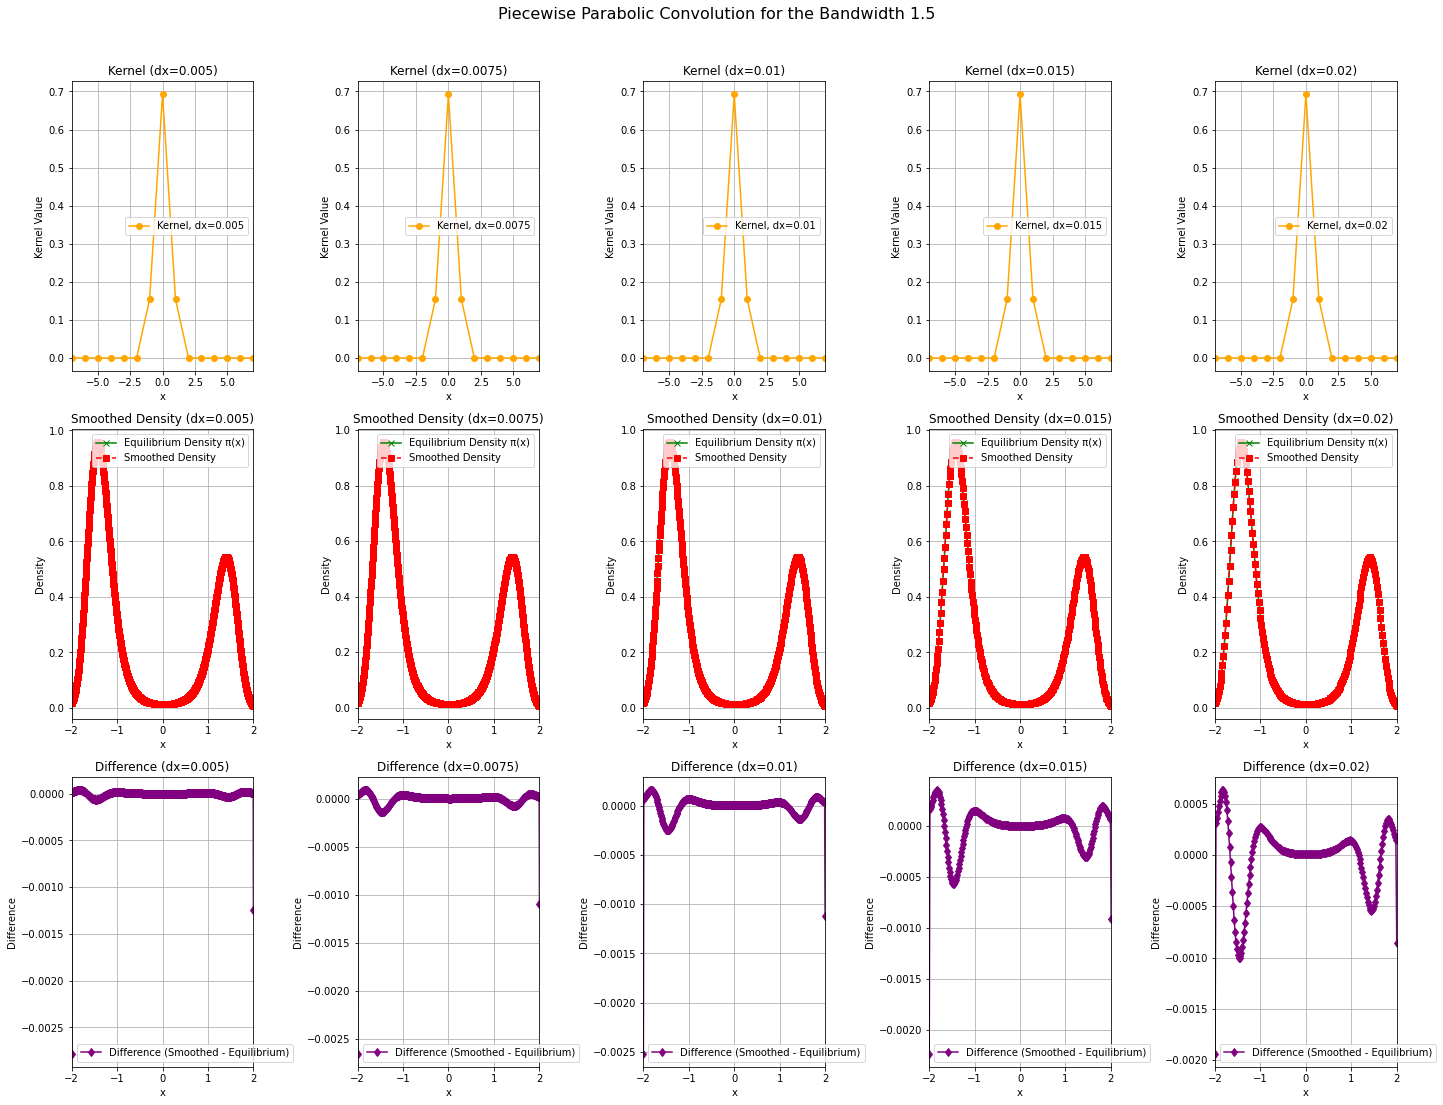

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve as scipy_convolve

# Custom convolve function
def convolve(g1, g2, mode="same", method="auto"):
    """Perform convolution between two grids via scipy.signal.convolve."""
    result = scipy_convolve(g1, g2, mode=mode, method=method)
    stepsizes_product = 1  # Modify if stepsizes are known and consistent
    result /= stepsizes_product
    return result

# Define the potential function V(x)
def potential(x):
    return x**4 - 4*x**2 + 0.2*x

# Calculate the equilibrium density π(x)
def equilibrium_density(x, beta=1.0):
    V_x = potential(x)
    Z = np.trapz(np.exp(-beta * V_x), x)  # Normalization constant
    return np.exp(-beta * V_x) / Z

# Create Piecewise Parabolic kernel for convolution
def piecewise_parabolic_kernel(size, sigma):
    kernel = np.linspace(-size, size, 2*size+1)
    kernel_values = np.zeros_like(kernel)
    for i, x in enumerate(kernel):
        if -sigma <= x < -sigma / 2:
            kernel_values[i] = (2 / sigma) * (1 + x / sigma)**2
        elif -sigma / 2 <= x <= sigma / 2:
            kernel_values[i] = (1 / sigma) - (2 / sigma) * (x / sigma)**2
        elif sigma / 2 < x <= sigma:
            kernel_values[i] = (2 / sigma) * (1 - x / sigma)**2
    kernel_values /= np.sum(kernel_values)
    return kernel_values

# Parameters
beta = 1.0
sigma = 1.5  # Fixed bandwidth
finer_lattice_spacings = [0.005, 0.0075, 0.01, 0.015, 0.02]  # Finer lattice spacings
x_min, x_max = -2, 2

# Create subplots for kernels and densities
fig, axs = plt.subplots(3, len(finer_lattice_spacings), figsize=(20, 15))

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Set the background color of all axes to white
for ax in axs.flat:
    ax.set_facecolor('white')

# Iterate over the different lattice spacings
for i, dx in enumerate(finer_lattice_spacings):
    # Define the grid for x
    x = np.arange(x_min, x_max + dx, dx)
    
    # Calculate equilibrium density
    pi_x = equilibrium_density(x, beta)
    
    # Generate Piecewise Parabolic kernel
    kernel_size = int(5 * sigma)
    parabolic_kernel_array = piecewise_parabolic_kernel(kernel_size, sigma)
    
    # Perform convolution to smooth the density
    smoothed_pi_x = convolve(pi_x, parabolic_kernel_array, mode='same')
    
    # Plot Piecewise Parabolic kernel
    kernel_x = np.linspace(-kernel_size, kernel_size, len(parabolic_kernel_array))
    axs[0, i].plot(kernel_x, parabolic_kernel_array, label=f'Kernel, dx={dx}', color='orange', marker='o')
    axs[0, i].set_xlabel('x')
    axs[0, i].set_ylabel('Kernel Value')
    axs[0, i].set_title(f'Kernel (dx={dx})')
    axs[0, i].legend()
    axs[0, i].grid(True)
    axs[0, i].set_xlim(-kernel_size, kernel_size)
    
    # Plot equilibrium density and smoothed density
    axs[1, i].plot(x, pi_x, label='Equilibrium Density π(x)', color='green', marker='x')
    axs[1, i].plot(x, smoothed_pi_x, label='Smoothed Density', color='red', linestyle='--', marker='s')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('Density')
    axs[1, i].set_title(f'Smoothed Density (dx={dx})')
    axs[1, i].legend()
    axs[1, i].grid(True)
    axs[1, i].set_xlim(x_min, x_max)
    
    # Compute and plot the difference between densities
    density_difference = smoothed_pi_x - pi_x
    axs[2, i].plot(x, density_difference, label='Difference (Smoothed - Equilibrium)', color='purple', marker='d')
    axs[2, i].set_xlabel('x')
    axs[2, i].set_ylabel('Difference')
    axs[2, i].set_title(f'Difference (dx={dx})')
    axs[2, i].legend()
    axs[2, i].grid(True)
    axs[2, i].set_xlim(x_min, x_max)

# Add a main title to the figure
fig.suptitle('Piecewise Parabolic Convolution for the Bandwidth 1.5', fontsize=16, y=1.02)

# Adjust layout and save density comparison and difference plots
plt.tight_layout()
plt.savefig('PiecewiseParabolicDensity_finer_dx.png', dpi=300, bbox_inches='tight', facecolor='white')  # Ensure white background

# Display the figure with all plots
plt.show()


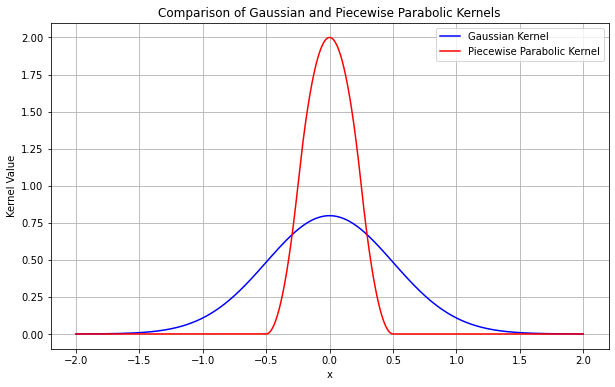

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (x / sigma) ** 2)

def piecewise_parabolic_kernel(x, sigma):
    kernel_value = np.zeros_like(x)
    sigma_half = 0.5 * sigma
    for i, xi in enumerate(x):
        if xi <= -sigma:
            kernel_value[i] = 0
        elif xi >= sigma:
            kernel_value[i] = 0
        elif xi <= -sigma_half:
            kernel_value[i] = 2 * ((1 + xi / sigma) ** 2) / sigma
        elif xi >= sigma_half:
            kernel_value[i] = 2 * ((1 - xi / sigma) ** 2) / sigma
        else:
            kernel_value[i] = (1 - 2 * (xi / sigma) ** 2) / sigma
    return kernel_value

x = np.linspace(-2, 2, 1000)
sigma = 0.5
gaussian_vals = gaussian_kernel(x, sigma)
parabolic_vals = piecewise_parabolic_kernel(x, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, gaussian_vals, label='Gaussian Kernel', color='blue')
plt.plot(x, parabolic_vals, label='Piecewise Parabolic Kernel', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('Kernel Value')
plt.title('Comparison of Gaussian and Piecewise Parabolic Kernels')
plt.grid(True)
plt.show()


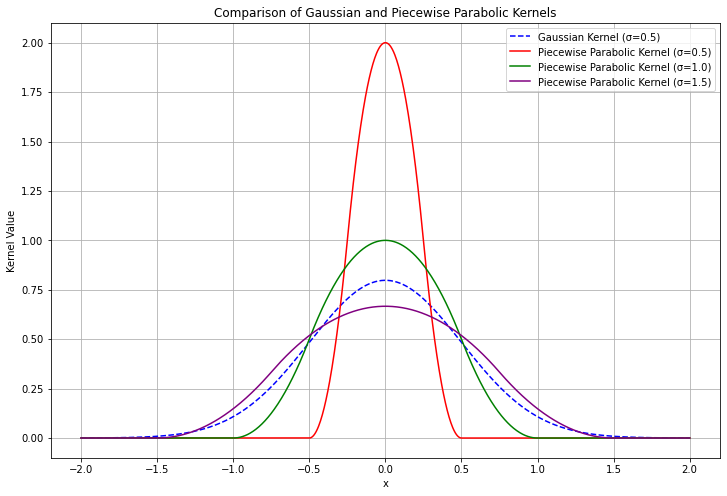

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x, sigma):
    """Compute the Gaussian kernel."""
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (x / sigma) ** 2)

def piecewise_parabolic_kernel(x, sigma):
    """Compute the Piecewise Parabolic kernel."""
    kernel_value = np.zeros_like(x)
    sigma_half = 0.5 * sigma
    for i, xi in enumerate(x):
        if xi <= -sigma or xi >= sigma:
            kernel_value[i] = 0
        elif xi <= -sigma_half:
            kernel_value[i] = 2 * ((1 + xi / sigma) ** 2) / sigma
        elif xi >= sigma_half:
            kernel_value[i] = 2 * ((1 - xi / sigma) ** 2) / sigma
        else:
            kernel_value[i] = (1 - 2 * (xi / sigma) ** 2) / sigma
    return kernel_value

# Parameters
x = np.linspace(-2, 2, 1000)
sigma_values = [0.5, 1.0, 1.5]  # Sigma values for the kernels

# Compute kernel values
gaussian_vals = gaussian_kernel(x, sigma_values[0])
parabolic_vals = [piecewise_parabolic_kernel(x, sigma) for sigma in sigma_values]

# Create a single plot
plt.figure(figsize=(12, 8))

# Plot Gaussian Kernel
plt.plot(x, gaussian_vals, label='Gaussian Kernel (σ=0.5)', color='blue', linestyle='--')

# Plot Piecewise Parabolic Kernels
colors = ['red', 'green', 'purple']
labels = [f'Piecewise Parabolic Kernel (σ={sigma})' for sigma in sigma_values]
for i, (parabolic_val, color, label) in enumerate(zip(parabolic_vals, colors, labels)):
    plt.plot(x, parabolic_val, color=color, label=label)

# Add labels, title, and legend
plt.xlabel('x')
plt.ylabel('Kernel Value')
plt.title('Comparison of Gaussian and Piecewise Parabolic Kernels')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
